In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from math import log
import numpy as np

In [2]:
# Import dataset
results_df = pd.read_csv("results.csv") 
results_df

,Model,Accuracy,Precision,Sensitivity,Specificity,F1,FLOPs,Parameters
0,MLN,0.84377,0.82838,0.82792,0.85372,0.80352,377720000,178850
1,MLN + FF,0.84457,0.83288,0.83019,0.85098,0.81375,328530000,92274
2,MLN + A,0.82295,0.76995,0.84562,0.81283,0.78383,332490000,101076
3,MLN + FF + A,0.81278,0.75488,0.85668,0.79238,0.77209,332500000,104990
4,MLN 1 Rep/Grp,0.68710,0.68309,0.65642,0.70503,0.58150,237900000,28666
5,MLN 2 Reps/Grp,0.72621,0.71816,0.82160,0.67318,0.71810,378410000,58898
6,MLN 3 Reps/Grp,0.88420,0.84635,0.84981,0.90381,0.83770,518930000,89130
7,MLN Deep,0.89312,0.86124,0.88181,0.90191,0.85967,567610000,199330
8,MLN RevGrps,0.80212,0.76565,0.87921,0.75584,0.78574,560580000,53034
9,MLN RevReps,0.81648,0.88861,0.57209,0.94132,0.65780,564850000,49146


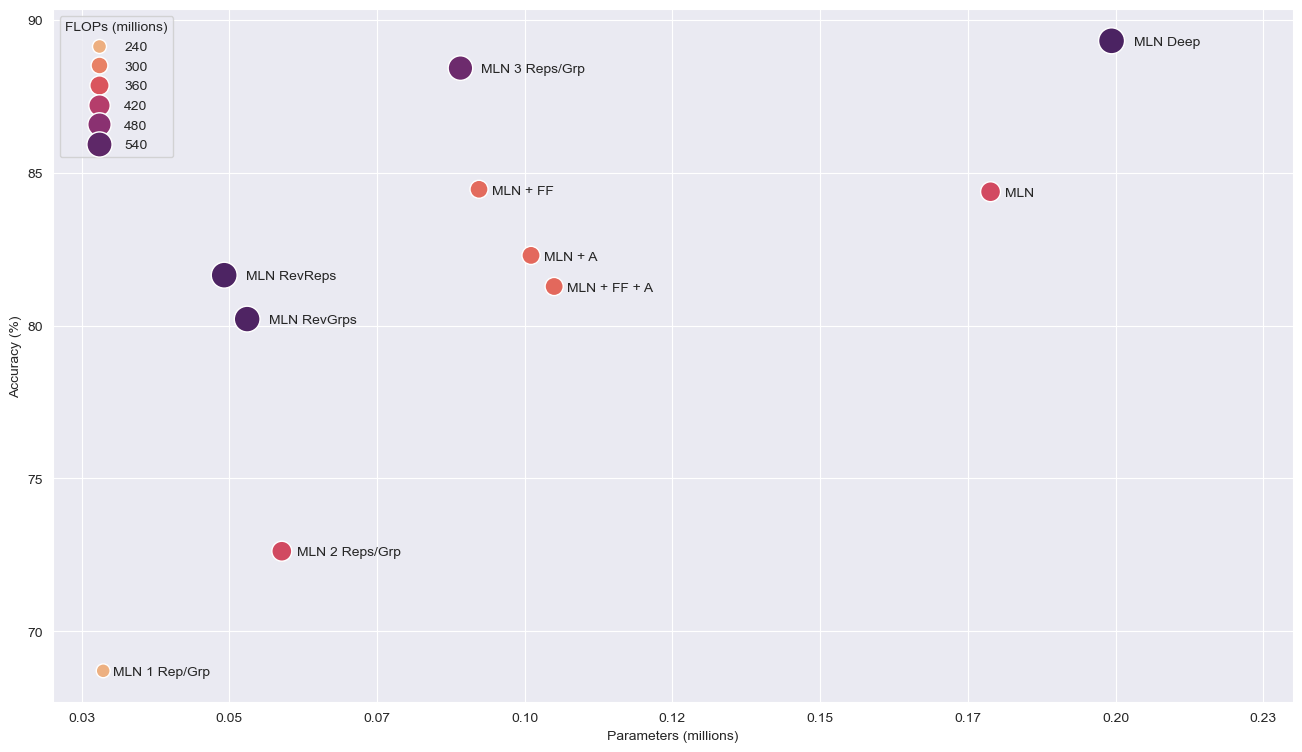

In [3]:
# Create scatter plot of MobileLookNet variations
mobilelooknet_results_df = results_df[0:10]

plt.figure(figsize = (16, 9)) # 16:9 ratio
sns.set_style("darkgrid")
sns.scatterplot(x = "Parameters",
                y = "Accuracy",
                data = mobilelooknet_results_df,
                palette = "flare",
                hue = "FLOPs",
                size = "FLOPs",
                sizes = (100, 350))

# Label models
x = mobilelooknet_results_df.Parameters
y = mobilelooknet_results_df.Accuracy
labels = mobilelooknet_results_df.Model
size = mobilelooknet_results_df.FLOPs
for i in range(len(x)): 
    plt.annotate(labels[i], (x[i] + size[i]/150000, y[i]-0.0015))

# Format numbers on axes
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y*100)))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000)))
plt.xlim(right=230000) # workaround to prevent label overflow

# Format labels
plt.xlabel("Parameters (millions)", fontsize = 10)
plt.ylabel("Accuracy (%)", fontsize = 10)

# Format legend
legend = plt.legend(title = 'FLOPs (millions)',
           loc = 'upper left')
for lbl in legend.get_texts():
    label_text = lbl.get_text()
    new_text = f'{int(float(label_text)/1000000)}'
    lbl.set_text(new_text)

plt.savefig(fname = 'mobilelooknet_scatter.svg',
            format = 'svg',
            pad_inches = 0,
            bbox_inches='tight')
plt.show()

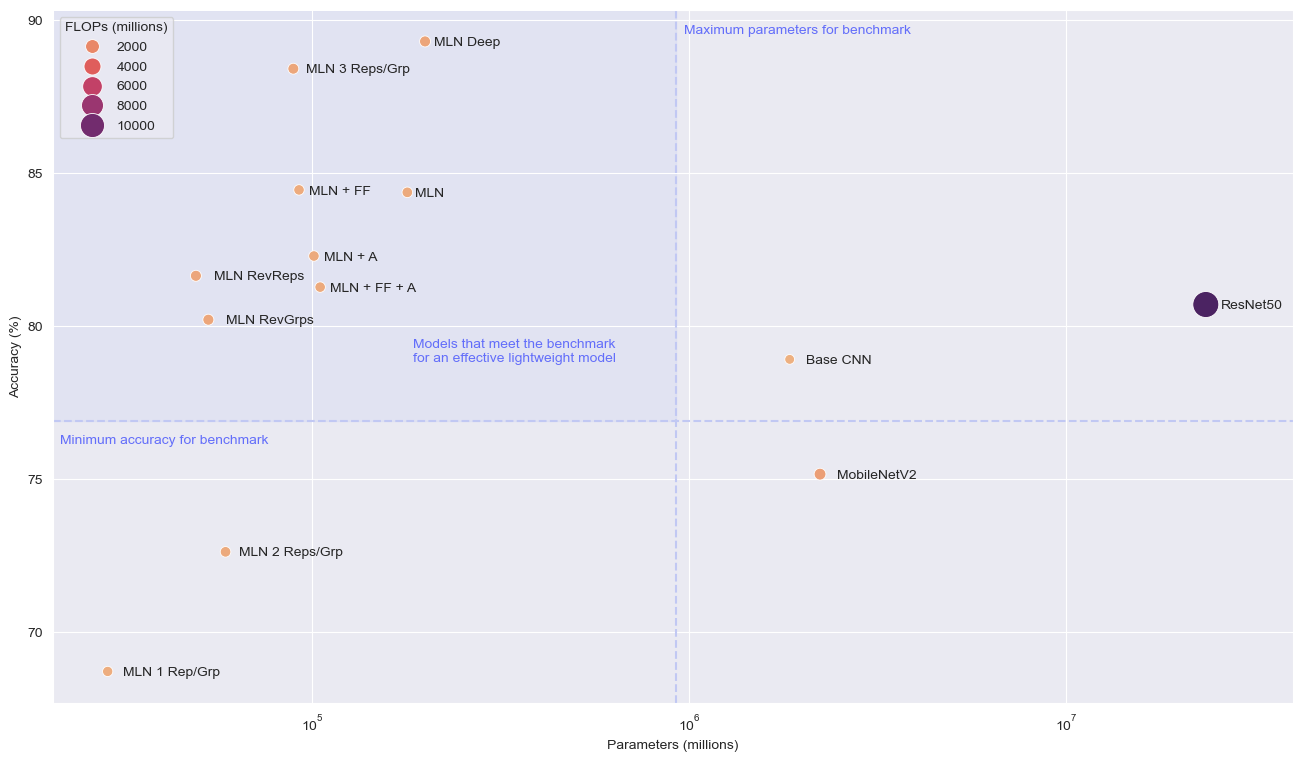

In [190]:
# Create scatter plot of all models
plt.figure(figsize = (16, 9)) # 16:9 ratio
sns.set_style("darkgrid")
sns.scatterplot(x = "Parameters",
                y = "Accuracy",
                data = results_df,
                palette = "flare",
                hue = "FLOPs",
                size = "FLOPs",
                sizes = (50, 350),
                legend='brief')

# Label models
x = results_df.Parameters
y = results_df.Accuracy
labels = results_df.Model
size = results_df.FLOPs
for i in range(len(x)): 
    plt.annotate(labels[i], (x[i] + size[i]/150000 + (1.1*x[i])/(log(x[i], 1.5) if x[i] < 10**6 else log(x[i], 4)), y[i]-0.0015))
    
# Format numbers on axes
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y*100)))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000)))
ax.set_xscale('log')
plt.xlim(right=40000000) # workaround to prevent label overflow

# Format labels
plt.xlabel("Parameters (millions)", fontsize = 10)
plt.ylabel("Accuracy (%)", fontsize = 10)

# Format legend
legend = plt.legend(title = 'FLOPs (millions)', loc = 'upper left')
for lbl in legend.get_texts():
    label_text = lbl.get_text()
    new_text = f'{int(float(label_text)/1000000)}'
    lbl.set_text(new_text)
                 
# Plot area that falls within benchmark
benchmark_accuracy = results_df.loc[results_df['Model'] == 'Base CNN']['Accuracy'].item() - 0.02
benchmark_params = results_df.loc[results_df['Model'] == 'Base CNN']['Parameters'].item() / 2

plt.axhline(benchmark_accuracy, linestyle = '--', color = '#C1C8F3')
plt.axvline(benchmark_params, linestyle = '--', color = '#C1C8F3')

annotation_x_offset = benchmark_params*.001
annotation_y_offset = benchmark_accuracy*.01

plt.annotate('Minimum accuracy for benchmark',
             (plt.xlim()[0] + annotation_x_offset, benchmark_accuracy - annotation_y_offset),
             color = '#636EFA')
plt.annotate('Maximum parameters for benchmark',
             (benchmark_params + annotation_x_offset*50, plt.ylim()[1] - annotation_y_offset),
             color = '#636EFA')

benchmark_accuracy_in_axis_units = (benchmark_accuracy - plt.ylim()[0])/(plt.ylim()[1] - plt.ylim()[0])

plt.axvspan(xmin = 0, xmax = benchmark_params,
            ymin = benchmark_accuracy_in_axis_units, ymax = 1,
            zorder = 0.5,
            alpha = 0.2, color = '#C1C8F3')
text_x_offset = benchmark_params*.8
text_y_offset = benchmark_accuracy*.025
plt.annotate('Models that meet the benchmark\nfor an effective lightweight model',
             (benchmark_params - text_x_offset, benchmark_accuracy + text_y_offset),
             color = '#636EFA')

# Save figure
#plt.savefig(fname = 'all_scatter.svg',
#            format = 'svg',
#            pad_inches = 0,
#            bbox_inches='tight')
plt.show()

# Plot scaling law of MobileLookNets based on number of repetitions per layer group

In [ ]:
mobilelooknet_scaled_models = ['MLN 1 Rep/Grp', 'MLN 2 Reps/Grp', 'MLN 3 Reps/Grp']
mobilelooknet_scaled_df = results_df.loc[results_df['Model'].isin(mobilelooknet_scaled_models)]

mobilelooknet_scaled_df.sort_values(by=['FLOPs'])

In [ ]:
fig, ax = plt.subplots(ncols = 2)

# Accuracy vs FLOPs
sns.regplot(data = mobilelooknet_scaled_df,
             x = "FLOPs",
             y = "Accuracy",
             ax = ax[0])

ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y*100)))
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000)))

ax[0].set_xlabel("FLOPs (millions)", fontsize = 10)
ax[0].set_ylabel("Accuracy (%)", fontsize = 10)

# Accuracy vs Parameters
sns.regplot(data = mobilelooknet_scaled_df,
             x = "Parameters",
             y = "Accuracy",
             ax = ax[1])

ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y*100)))
ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000)))

ax[1].set_xlabel("Parameters (millions)", fontsize = 10)
ax[1].set_ylabel("Accuracy (%)", fontsize = 10)

In [ ]:
# Accuracy vs FLOPs
fig, ax = plt.subplots(ncols = 2)
sns.regplot(data = mobilelooknet_scaled_df,
             x = "FLOPs",
             y = "Accuracy")
plt.show()

In [ ]:
# Radar/spider/star chart of all MobileLookNet charts
# Each attribute we'll plot in the radar chart.
labels = ['Accuracy', 'FLOPs', 'Parameters']
results_df = results_df.set_index('Model')
results_df

In [ ]:
import plotly.graph_objects as go
import plotly.offline as pyo

categories = ['Food Quality', 'Food Variety', 'Service Quality', 'Ambience', 'Affordability']
categories = [*categories, categories[0]]

restaurant_1 = [4, 4, 5, 4, 3]
restaurant_2 = [5, 5, 4, 5, 2]
restaurant_3 = [3, 4, 5, 3, 5]
restaurant_1 = [*restaurant_1, restaurant_1[0]]
restaurant_2 = [*restaurant_2, restaurant_2[0]]
restaurant_3 = [*restaurant_3, restaurant_3[0]]


fig = go.Figure(
    data=[
        go.Scatterpolar(r=restaurant_1, theta=categories, name='Restaurant 1'),
        go.Scatterpolar(r=restaurant_2, theta=categories, name='Restaurant 2'),
        go.Scatterpolar(r=restaurant_3, theta=categories, name='Restaurant 3')
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Restaurant comparison'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

pyo.plot(fig)